# Decision Tree Classification
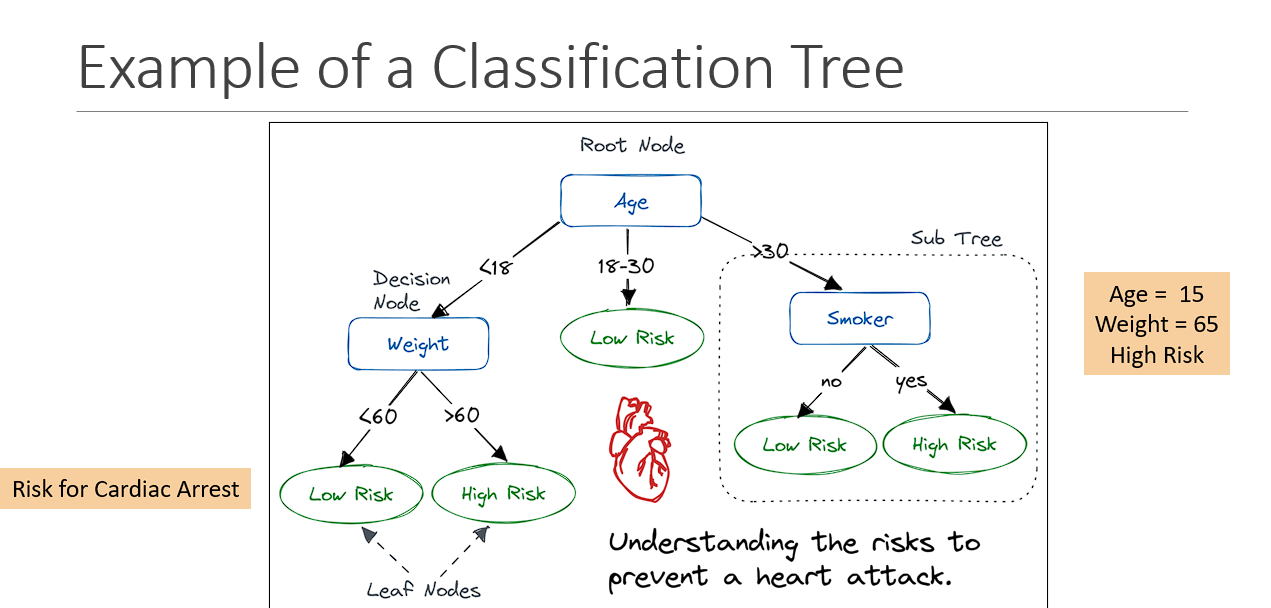

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train Dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

# Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:

Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Step 4: Perform preprocessing on X

In [9]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute' , SimpleImputer(strategy='mean')),
                           ('scalar' , StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# Step 5: Perform train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [14]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [15]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [16]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [17]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [18]:
xtrain.shape

(100, 4)

In [19]:
xtest.shape

(50, 4)

# Astype method to change datatype

In [20]:
df['petal_length']= df['petal_length'].astype(float)

# Step 6: Build the base model

In [22]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [23]:
model1.score(xtrain,ytrain)

0.66

In [24]:
model1.score(xtest,ytest)

0.68

# Step 7: Hyperparameter Tuning - GridSearchCV

In [25]:
params = {'max_depth':[1, 2, 3, 4, 5],
          'min_samples_split':[2, 3, 4, 5, 6, 7],
          'min_samples_leaf':[2, 3, 4, 5, 6, 7],
          'criterion':['gini', 'entropy']}

In [27]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc , param_grid=params , cv=5 , scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [28]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [29]:
gscv.best_score_

0.9223826173826174

In [30]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

# Step 8: Evaluate tuned model

In [31]:
best_dtc.score(xtrain,ytrain)

0.97

In [32]:
best_dtc.score(xtest,ytest)

0.98

In [33]:
# Predict the results for train and test
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [34]:
ypred_train[0:5]


array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [35]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [36]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [37]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


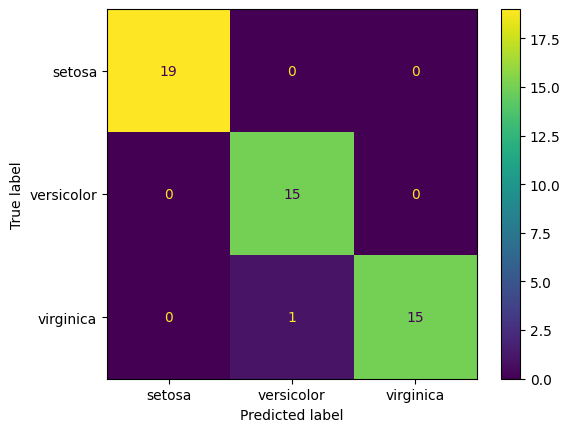

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model1.classes_)
cfd.plot()

In [41]:
# Print Classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([1.        , 0.80952381, 0.90277778, 0.95213675, 0.94747475])

In [43]:
scores.mean()

0.9223826173826174

# Step 9: Predict out of sample data

In [45]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [46]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scalar', StandardScaler())])

In [47]:
X_pre_new = num_pipe.fit_transform(xnew)
X_pre_new

,sepal_length,sepal_width,petal_length,petal_width
0,-0.446992,-1.086540e+00,0.099639,2.157391e-02
1,1.259705,4.096792e-01,0.866862,1.531748e+00
2,-0.934620,-1.086540e+00,-0.597836,-2.804609e-01
3,-1.787968,-8.906070e-02,0.000000,-1.639617e+00
4,0.040636,1.603093e-01,0.866862,7.766609e-01
5,-0.446992,1.407159e+00,-1.783543,-1.639617e+00
6,-0.325085,1.107425e-15,-0.179351,2.157391e-02
7,0.772077,1.603093e-01,0.936609,1.078696e+00
8,-0.690806,1.905899e+00,-1.644048,-1.639617e+00
9,-0.934620,1.157789e+00,-1.644048,3.353260e-16


# Get predictions along with probability

In [49]:
preds = best_dtc.predict(X_pre_new)
probs = best_dtc.predict_proba(X_pre_new)

In [50]:
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [51]:
probs

array([[0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.94444444, 0.05555556]])

In [52]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
import numpy as np
max_probs = np.max(probs,axis=1)
max_probs

array([0.94444444, 1.        , 0.94444444, 0.94444444, 1.        ,
       1.        , 0.94444444, 1.        , 1.        , 1.        ,
       0.94444444, 0.94444444, 1.        , 0.94444444, 0.94444444])

In [55]:
xnew['species_pred'] = preds
xnew['Probs'] = max_probs

In [56]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,Probs
0,5.5,2.5,4.0,1.3,versicolor,0.944444
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.944444
3,4.4,2.9,NaN,0.2,versicolor,0.944444
4,5.9,3.0,5.1,1.8,virginica,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,0.944444
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [57]:
xnew.to_csv('Results.csv', index=False)

# Plotting the Decision Tree

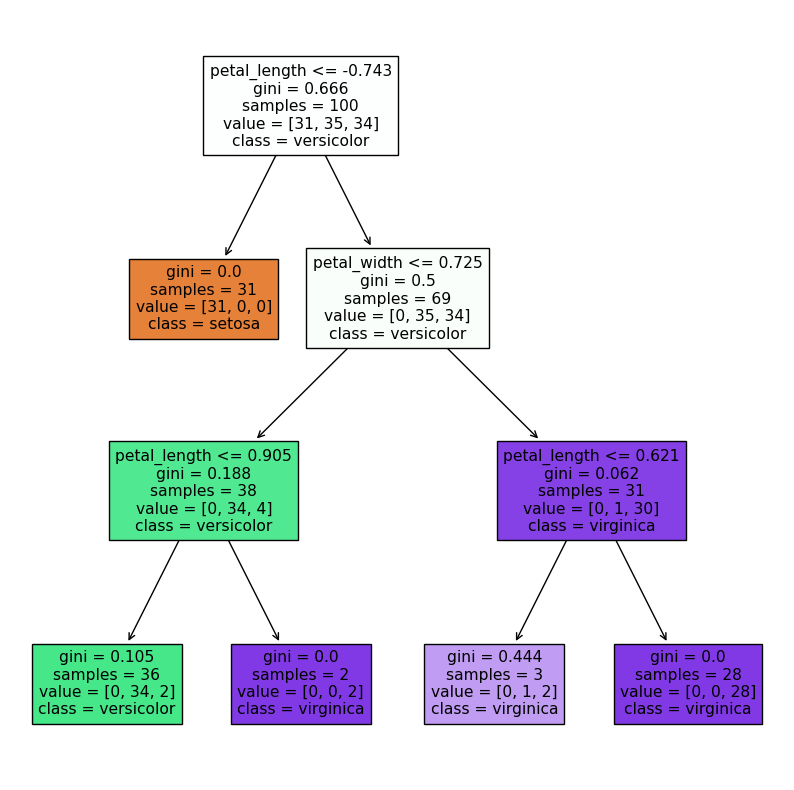

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc,
          feature_names=xtrain.columns,
          class_names=best_dtc.classes_,
          filled=True)
plt.show()

In [59]:
xtrain.shape

(100, 4)

In [60]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
ytrain.value_counts()

species   
versicolor    35
virginica     34
setosa        31
Name: count, dtype: int64

# Plotting base model

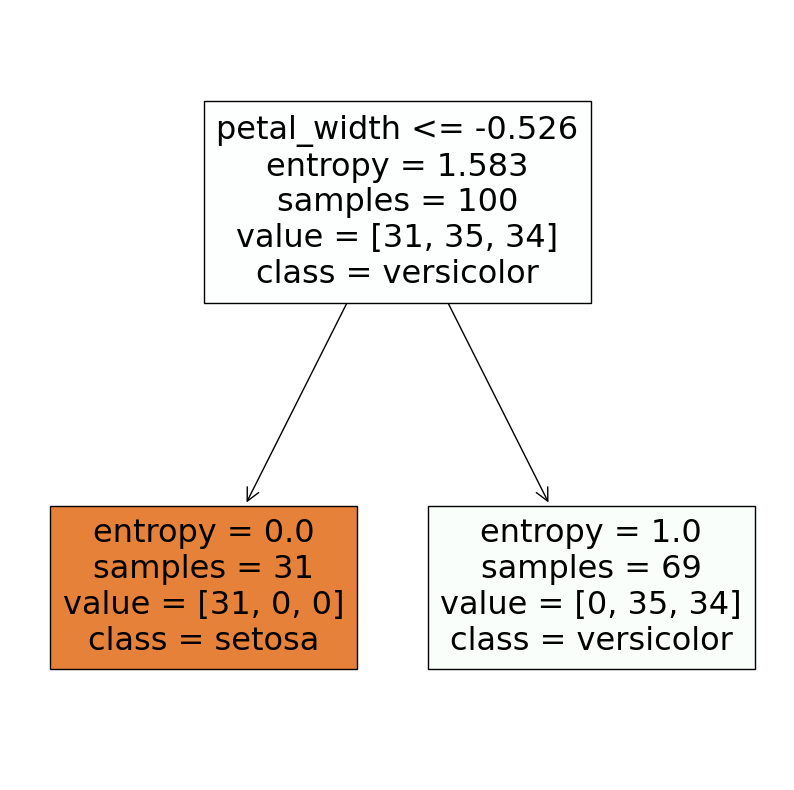

In [62]:
plt.figure(figsize=(10,10))
plot_tree(model1, 
          feature_names=xtrain.columns, 
          class_names=best_dtc.classes_,
          filled=True)
plt.show()